In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
import yfinance as yf
stock_symbol = 'TSLA'
df = yf.download(tickers=stock_symbol,period='1y',interval='1d')
df = df.reset_index()
df.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-05-24,653.530029,653.919983,620.570007,628.159973,628.159973,29697500
249,2022-05-25,623.849976,669.320007,623.010010,658.799988,658.799988,30713100
250,2022-05-26,661.419983,718.669983,653.659973,707.729980,707.729980,35334400
251,2022-05-27,723.250000,759.799988,720.530029,759.630005,759.630005,29630300
252,2022-05-31,773.840027,778.799988,734.229980,758.260010,758.260010,33893000


In [3]:
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])
returns = df.Close.pct_change()

In [ ]:
volatility = returns.std()

In [4]:
number_simulation = 10
predict_day = 30
returns = df.Close.pct_change()
volatility = returns.std()
results = pd.DataFrame()

In [5]:
volatility

0.03711779229296067

In [12]:
for i in tqdm(range(number_simulation)):
    prices = []
    ran_arr = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        v = np.random.normal(0, volatility)
        ran_arr.append(v)
        prices.append(prices[d] * (1 + v))
    results[i] = pd.Series(prices).values

100%|██████████| 10/10 [00:00<00:00, 558.15it/s]


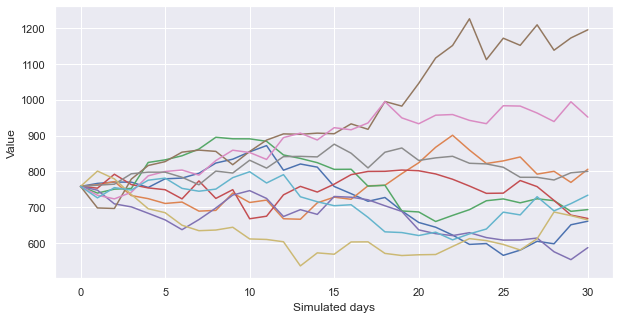

In [13]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

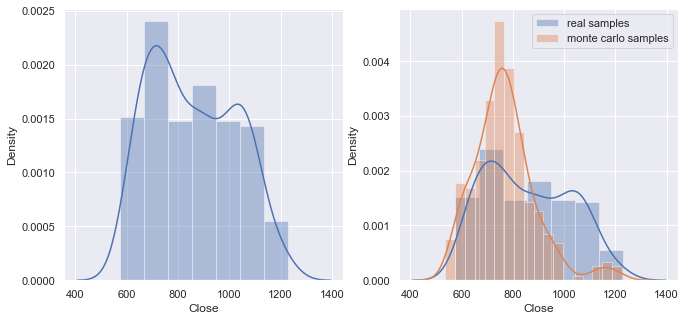

In [21]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
#plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))

plt.subplot(1,3,3)
sns.distplot(df.Close,norm_hist=True,label='real samples')
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
#plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()